In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import os
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import time
drive.mount('/content/drive', force_remount=True)

DATADIR = os.path.join(os.getcwd(), "drive", "My Drive", "TU20 Cup", "Old", "AI")

CATEGORIES = ["Desert", "At Risk", "Safe", "Urban"]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
test_X = np.load(os.path.join(DATADIR, "Test Images", "test_X.npy"))
test_y = np.load(os.path.join(DATADIR, "Test Images", "test_y.npy"))
test_X = test_X/255.0

In [3]:
load_file = input("What model would you like to load?\n") + ".h5"
model = tf.keras.models.load_model(os.path.join(DATADIR, "Models", load_file))
print("\nTesting:")

model.evaluate(test_X, test_y, batch_size=4, verbose=1)

What model would you like to load?
main

Testing:
16/16 [==============================] - 2s 144ms/step - loss: 0.1441 - accuracy: 0.9688


[0.1441216915845871, 0.96875]

Prediction: Urban


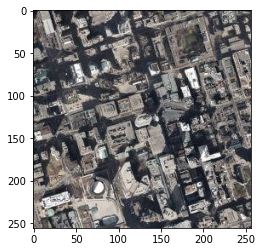

Prediction: At Risk


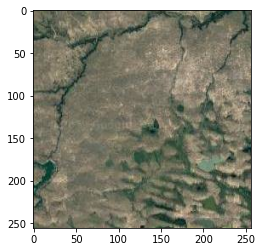

Prediction: At Risk


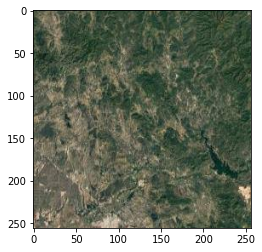

Prediction: Safe


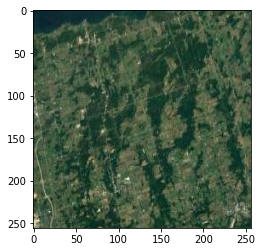

Prediction: Safe


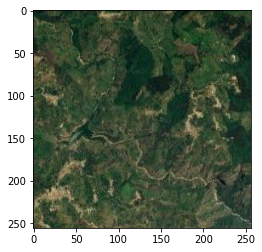

Prediction: Desert


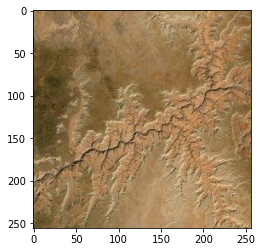

Prediction: Desert


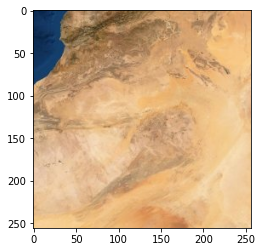

Prediction: Urban


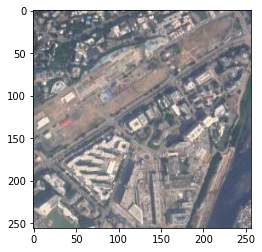

In [4]:
for img in os.listdir(os.path.join(DATADIR, "Selected Images")):
  img_array = cv2.imread(os.path.join(DATADIR, "Selected Images", img))
  #BGR to RGB
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = np.array(img_array).reshape(256, 256, 3)
  img_array_list = np.array(img_array).reshape(1, 256, 256, 3)
  prediction = model.predict(img_array_list)
  print("Prediction: " + CATEGORIES[np.argmax(prediction)])
  plt.imshow(img_array_list[0])
  plt.show()
  time.sleep(1)